# Importing useful Python Libraries

In [1]:
import pandas as pd #For data manipulation and analysis
import numpy as np #For mathematical calculations
import matplotlib.pyplot as plt #for visualisations and graph plotting
import nltk #For statistical language Processing
import seaborn as sns #For visualisation
import re #For string manipulation
from wordcloud import WordCloud #for Textual sentiment analysis
from nltk.probability import FreqDist #for Textual sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer #for Textual sentiment analysis
nltk.download(['stopwords',
               'punkt', 
               'wordnet', 
               'omw-1.4', 
               'vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\tourist_accommodation_reviews.csv', encoding = 'unicode_escape')

In [3]:
df.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [4]:
df.shape

(53644, 5)

# Dataset Pre-processing for Sentiment Analysis

The code below is used to define a function to remove punctuaction, numbers, urls and stopwords from a test character

In [5]:
stop = nltk.corpus.stopwords.words('english')
def preprocessed(text):
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    text = " ".join([word for word in text.split() if word not in (stop)])
    return text

In [6]:
df['cleaned_review'] = df['Review'].apply(preprocessed)

In [7]:
df.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,cleaned_review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,Just sunday roast lamb beef truly excellent11o...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",Quietly set main road nice atmosphere Immacula...
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,I made reservation birthday two days advance a...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,We visit regularly never fail impressed qualit...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,Visited wonderful place travels cannot complai...


# Sentiment Analysis using VADER

The line of codes below uses the VADER sentiment analyser library to calculate the polarity score for each of the hotels in the dataset

In [8]:
sentiment = SentimentIntensityAnalyzer()
df['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df['cleaned_review']]
df['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df['cleaned_review']]
df['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df['cleaned_review']]
df['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df['cleaned_review']]

In [9]:
df.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,cleaned_review,compound,neg,neu,pos
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,Just sunday roast lamb beef truly excellent11o...,0.0516,0.163,0.663,0.175
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",Quietly set main road nice atmosphere Immacula...,0.9237,0.000,0.612,0.388
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,I made reservation birthday two days advance a...,0.6808,0.000,0.823,0.177
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,We visit regularly never fail impressed qualit...,0.5250,0.090,0.702,0.209
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,Visited wonderful place travels cannot complai...,0.9713,0.000,0.377,0.623


In [10]:
df[['compound', 'neg', 'pos', 'neu']].describe()

,compound,neg,pos,neu
count,53644.000000,53644.000000,53644.000000,53644.000000
mean,0.667582,0.036372,0.328280,0.635344
std,0.389778,0.068481,0.167218,0.155105
min,-0.966200,0.000000,0.000000,0.156000
25%,0.585900,0.000000,0.208000,0.525000
50%,0.831600,0.000000,0.331000,0.630000
75%,0.918600,0.062000,0.450000,0.743000
max,0.992800,0.635000,0.844000,1.000000


The result in the table above shows that the majority of the reviews in the dataset portray a strong positive, note that the median of the compound is 0.83

<AxesSubplot:xlabel='compound', ylabel='Count'>

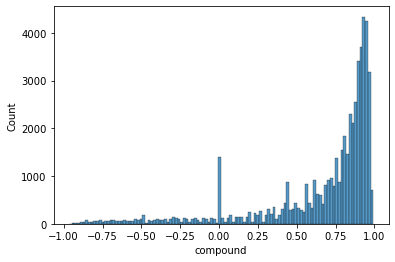

In [11]:
sns.histplot(df['compound'])

The figure above is the distribution of the compound score

<AxesSubplot:xlabel='pos', ylabel='Count'>

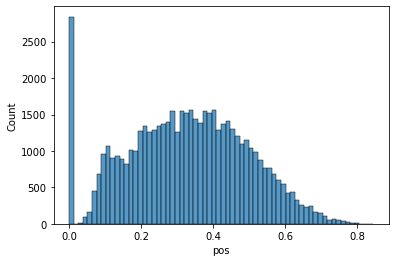

In [12]:
sns.histplot(df['pos'])

The figure above is the distribution of the positive score

<AxesSubplot:xlabel='neu', ylabel='Count'>

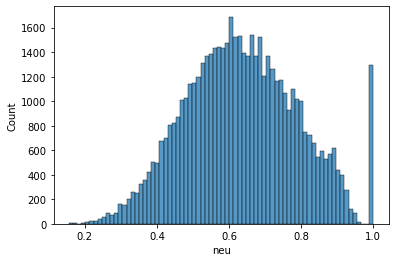

In [13]:
sns.histplot(df['neu'])

The figure above is the distribution of the neutral score

<AxesSubplot:xlabel='neg', ylabel='Count'>

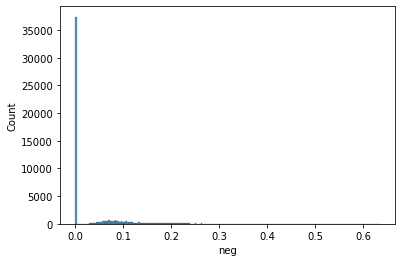

In [14]:
sns.histplot(df['neg'])

In [15]:
df.rename(columns = {'Hotel/Restaurant name':'Hotel'},inplace = True)

The figure above is the distribution of the negative score

# Grouping and Exploring the Dataset

In [16]:
(df['compound']<=0).groupby(df['Hotel']).sum()

Hotel
+39 Italian Street Food              9
2gether Restaurant                  13
3 Spices Restaurant                  5
360 ° Bar                            6
44 Thaikitchen "KATA FOOD COURT"     5
                                    ..
Ying Restaurant                      4
Yo Green Restaurant                 11
Yorkshire Hotel Restaurant          12
You and Me Patong                    7
i-Kroon Cafe                         4
Name: compound, Length: 537, dtype: int64

The code above was used to group the hotels in the dataset having thier compound score less than 0 i.e. having negative score and representing a strong negative sentiment. The output of the code shows the hotels in the dataset with the scores with the frequency of occurence of thier negative scores. 

In [17]:
(df['compound']>0.75).groupby(df['Hotel']).sum()

Hotel
+39 Italian Street Food             59
2gether Restaurant                  59
3 Spices Restaurant                 66
360 ° Bar                           76
44 Thaikitchen "KATA FOOD COURT"    64
                                    ..
Ying Restaurant                     59
Yo Green Restaurant                 61
Yorkshire Hotel Restaurant          63
You and Me Patong                   56
i-Kroon Cafe                        72
Name: compound, Length: 537, dtype: int64

The code above was used to group the hotels in the dataset having their compound score greater than 0.75 i.e. having a strong positive sentiment. The outcome shows the hotels in the dataset with the scores and the frequency of occurence of their positive scores.

In [18]:
per_neg = pd.DataFrame((df['compound']<=0).groupby(df['Hotel']).sum()
                      /df['Hotel'].groupby(df['Hotel']).count()*100,
                      columns = ['% Negative review']).sort_values(by ='% Negative review')

The code above is used to calculate the percentage of the negative scores in the review of all the hotels in the dataset. The head of the newly formed dataframe is as obtained in cell 19 below

In [19]:
per_pos = pd.DataFrame((df['compound']> 0.75).groupby(df['Hotel']).sum()
                      /df['Hotel'].groupby(df['Hotel']).count()*100,
                      columns = ['% Positive review']).sort_values(by ='% Positive review')

The code above is used to calculate the percentage of the positive scores in the review of all the hotels in the dataset. The head of the newly formed dataframe is as obtained in cell 20 below

In [20]:
per_neg

,% Negative review
Hotel,
Chekhoff Restaurant and Bar,0.000000
Mando Restaurant & Steakhouse,1.000000
Thong Dee The Kathu Brasserie,1.000000
Sweet Dream Restaurant,1.000000
La Sala - Anantara Mai Khao Phuket Villas,1.010101
...,...
Pizza Hut - Jungceylon,32.323232
Mama Restaurant - Karon Beach,33.000000
Ali Baba Restaurant,37.000000


In [21]:
per_pos

,% Positive review
Hotel,
Khun Pha,19.354839
La Casa,21.875000
Chaba,24.000000
Thai Express - Turtle Village,25.000000
Food Court at Banzaan Fresh Market,29.000000
...,...
White Box Phuket,83.000000
Sala Sawasdee Lobby Bar,84.536082
Rock Salt,86.000000


The code below is used to show the hotels whose percentage negative reviews are less than 1.05%. Invariably, the hotels gotten shown in the list have more than 95% percentage positive review and neutral review from thier customers

In [22]:
pos_great = per_neg.loc[(per_neg['% Negative review']<= 1.05)]

In [23]:
pos_great.head()

,% Negative review
Hotel,
Chekhoff Restaurant and Bar,0.000000
Mando Restaurant & Steakhouse,1.000000
Thong Dee The Kathu Brasserie,1.000000
Sweet Dream Restaurant,1.000000
La Sala - Anantara Mai Khao Phuket Villas,1.010101


In [24]:
pos_greater_80 = per_pos.loc[(per_pos['% Positive review']> 80)]

In [25]:
pos_greater_80.head()

,% Positive review
Hotel,
Enjoy's Italian Bar & Restaurant,80.612245
KEE Sky Lounge & Restaurant,80.612245
Delish Cafe,80.808081
OSOT,81.000000
Ao Chalong Yacht Club Restaurant,81.000000


<AxesSubplot:xlabel='% Negative review', ylabel='Hotel'>

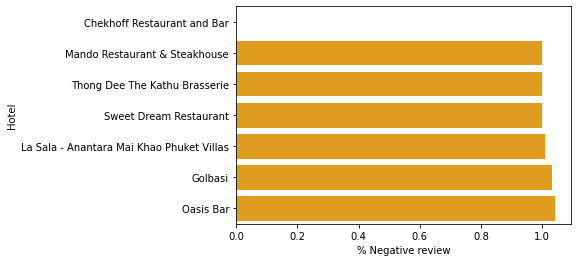

In [26]:
sns.barplot(data = pos_great, x = pos_great['% Negative review'], y = pos_great.index, color = 'orange')

In [27]:
neg_less_25 = per_neg.loc[(per_neg['% Negative review'] > 25)]

In [28]:
neg_less_25.head()

,% Negative review
Hotel,
Mr Good's Seafood,26.000000
Kata Country House Restaurant,26.000000
Cairo Restaurant,27.000000
Karon Seafood,27.000000
Jeffer,27.083333


<AxesSubplot:xlabel='% Negative review', ylabel='Hotel'>

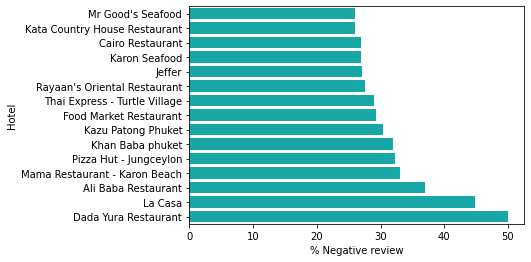

In [29]:
sns.barplot(data = neg_less_25, x = neg_less_25['% Negative review'], y = neg_less_25.index, color = 'c')

<AxesSubplot:xlabel='% Positive review', ylabel='Hotel'>

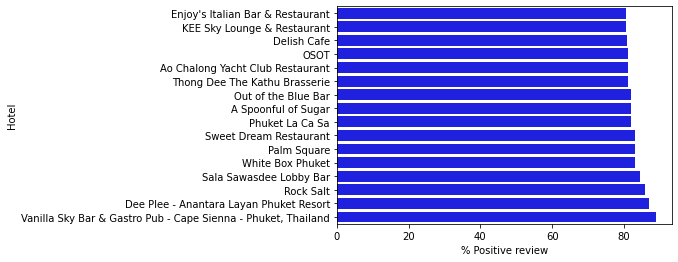

In [30]:
sns.barplot(data = pos_greater_80, x = pos_greater_80['% Positive review'], y = pos_greater_80.index, color = 'b')

In [31]:
def preprocessed_text(text):
    tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenizer if word.lower() not in stop]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

In [32]:
df['processed_review'] = df['cleaned_review'].apply(preprocessed_text)

In [33]:
df.head()

,ID,Review Date,Location,Hotel,Review,cleaned_review,compound,neg,neu,pos,processed_review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,Just sunday roast lamb beef truly excellent11o...,0.0516,0.163,0.663,0.175,"[sunday, roast, lamb, beef, truli, excellent11..."
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",Quietly set main road nice atmosphere Immacula...,0.9237,0.000,0.612,0.388,"[quietli, set, main, road, nice, atmospher, im..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,I made reservation birthday two days advance a...,0.6808,0.000,0.823,0.177,"[made, reserv, birthday, two, day, advanc, ass..."
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,We visit regularly never fail impressed qualit...,0.5250,0.090,0.702,0.209,"[visit, regularli, never, fail, impress, quali..."
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,Visited wonderful place travels cannot complai...,0.9713,0.000,0.377,0.623,"[visit, wonder, place, travel, cannot, complai..."


In [34]:
positive_hotel_reviews = df.loc[(df['compound'] > 0)]
negative_hotel_reviews = df.loc[(df['compound'] <= 0)]

In [35]:
positive_hotel_reviews.head()

,ID,Review Date,Location,Hotel,Review,cleaned_review,compound,neg,neu,pos,processed_review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,Just sunday roast lamb beef truly excellent11o...,0.0516,0.163,0.663,0.175,"[sunday, roast, lamb, beef, truli, excellent11..."
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",Quietly set main road nice atmosphere Immacula...,0.9237,0.000,0.612,0.388,"[quietli, set, main, road, nice, atmospher, im..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,I made reservation birthday two days advance a...,0.6808,0.000,0.823,0.177,"[made, reserv, birthday, two, day, advanc, ass..."
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,We visit regularly never fail impressed qualit...,0.5250,0.090,0.702,0.209,"[visit, regularli, never, fail, impress, quali..."
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,Visited wonderful place travels cannot complai...,0.9713,0.000,0.377,0.623,"[visit, wonder, place, travel, cannot, complai..."


In [36]:
negative_hotel_reviews.head()

,ID,Review Date,Location,Hotel,Review,cleaned_review,compound,neg,neu,pos,processed_review
74,rn537412994,"Reviewed October 31, 2017",Kathu,Thong Dee The Kathu Brasserie,We usually dont check TripAdvisor as we tend ...,We usually dont check TripAdvisor tend go plac...,0.0000,0.000,1.000,0.000,"[usual, dont, check, tripadvisor, tend, go, pl..."
130,rn575120133,Reviewed 3 weeks ago,Kata Beach,Odysseus Greek Organic Restaurant,Had high expectations with all the good review...,Had high expectations good reviews Very disapp...,-0.6318,0.337,0.525,0.138,"[high, expect, good, review, disappoint, also,..."
132,rn574857703,Reviewed 4 weeks ago,Kata Beach,Odysseus Greek Organic Restaurant,Family wanted something a little different for...,Family wanted something little different dinne...,-0.7351,0.269,0.643,0.088,"[famili, want, someth, littl, differ, dinner, ..."
159,rn571208476,"Reviewed April 5, 2018",Kata Beach,Odysseus Greek Organic Restaurant,Very hospitable and desperate chief. Small gre...,Very hospitable desperate chief Small green co...,-0.3774,0.119,0.881,0.000,"[hospit, desper, chief, small, green, corner, ..."
189,rn568172068,"Reviewed March 22, 2018",Kata Beach,Odysseus Greek Organic Restaurant,Never thought I would have good Greek food in ...,Never thought I would good Greek food Thailand...,-0.3412,0.088,0.912,0.000,"[never, thought, would, good, greek, food, tha..."


# Genereating Wordcloud for the Hotels with positive sentiments

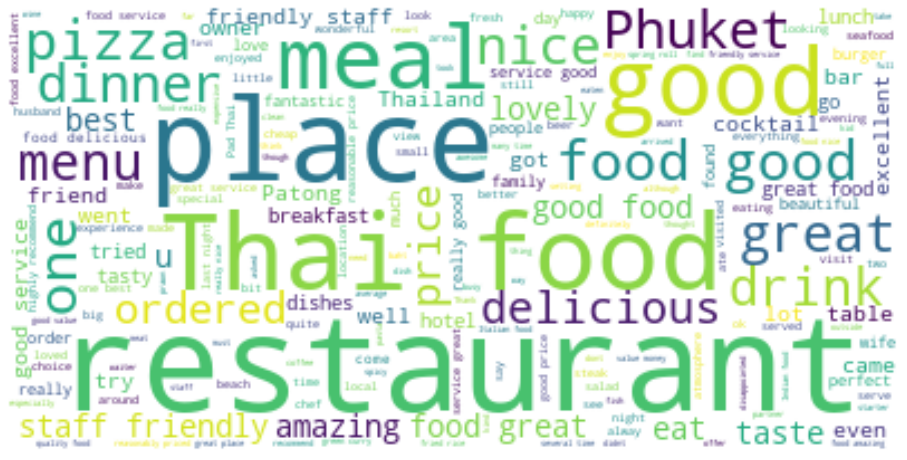

In [37]:
pos_tokens = [word for review in positive_hotel_reviews['cleaned_review'] for word in review]
wordcloud = WordCloud(background_color = 'white').generate_from_text(''.join(pos_tokens))

plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Generating WOrdcloud for Hotels with negative sentiments

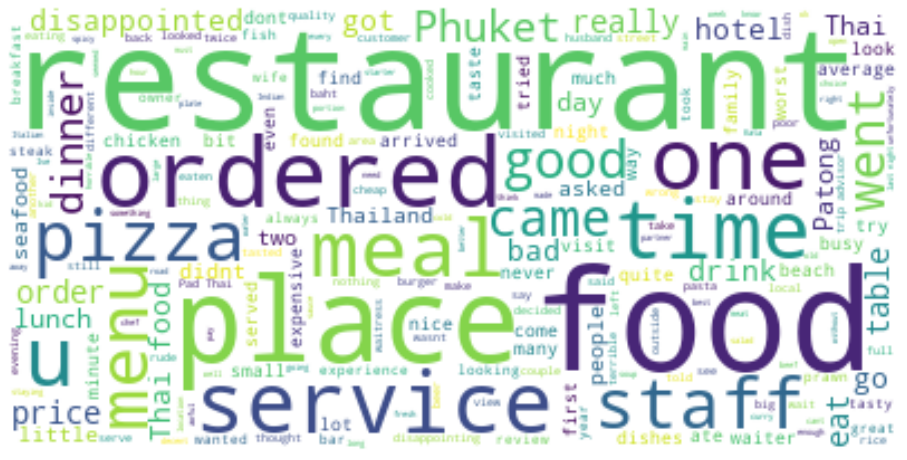

In [38]:
neg_tokens = [word for review in negative_hotel_reviews['cleaned_review'] for word in review]
wordcloud = WordCloud(background_color = 'white').generate_from_text(''.join(neg_tokens))

plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Generating and Visualisation of Frequency of words for Positive and Negative sentiments

In [39]:
pos_freq_token = [word for review in positive_hotel_reviews['processed_review'] for word in review]
pos_freqdist = FreqDist(pos_freq_token)
pos_freqdist.tabulate(5)

   food    good restaur   great   place 
  32365   20420   15903   15016   12343 


In [40]:
neg_freq_token = [word for review in negative_hotel_reviews['processed_review'] for word in review]
neg_freqdist = FreqDist(neg_freq_token)
neg_freqdist.tabulate(10)

   food restaur   order   place  servic    time    thai     one   staff    went 
   2698    1884    1320    1134     983     881     861     733     622     605 


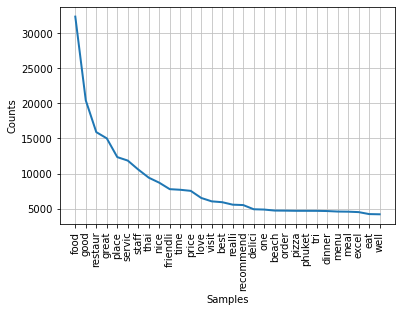

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [41]:
pos_freqdist.plot(30)

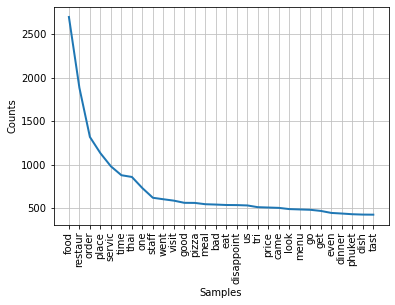

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [42]:
neg_freqdist.plot(30)

# Selecting 30 hotels from the dataset

In [43]:
df.head()

,ID,Review Date,Location,Hotel,Review,cleaned_review,compound,neg,neu,pos,processed_review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,Just sunday roast lamb beef truly excellent11o...,0.0516,0.163,0.663,0.175,"[sunday, roast, lamb, beef, truli, excellent11..."
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",Quietly set main road nice atmosphere Immacula...,0.9237,0.000,0.612,0.388,"[quietli, set, main, road, nice, atmospher, im..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,I made reservation birthday two days advance a...,0.6808,0.000,0.823,0.177,"[made, reserv, birthday, two, day, advanc, ass..."
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,We visit regularly never fail impressed qualit...,0.5250,0.090,0.702,0.209,"[visit, regularli, never, fail, impress, quali..."
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,Visited wonderful place travels cannot complai...,0.9713,0.000,0.377,0.623,"[visit, wonder, place, travel, cannot, complai..."


Randomly selecting 30 hotels/Restaurant from the dataset

In [44]:
data1 = df.drop_duplicates(subset=["Hotel"], keep="last").sample(n=30,random_state=1)

In [45]:
data1.head()

,ID,Review Date,Location,Hotel,Review,cleaned_review,compound,neg,neu,pos,processed_review
6337,rn494467963,"Reviewed June 20, 2017",Bang Tao Beach,Pooh and Friends,"Cold beer, excellent curries, great noodles, i...",Cold beer excellent curries great noodles incr...,0.9234,0.000,0.645,0.355,"[cold, beer, excel, curri, great, noodl, incre..."
37453,rn520707717,"Reviewed September 3, 2017",Patong,Elephant No.9 Restaurant,"The lobster was very rich, and the seafood gla...",The lobster rich seafood glaze die I really lo...,0.6125,0.088,0.645,0.267,"[lobster, rich, seafood, glaze, die, realli, l..."
18650,rn340009176,"Reviewed January 14, 2016",Kata Beach,Two Chefs Kata Center,3rd dining experience in Two Chefs restaurants...,3rd dining experience Two Chefs restaurants Ph...,0.2280,0.050,0.872,0.078,"[3rd, dine, experi, two, chef, restaur, phuket..."
36162,rn477447087,"Reviewed April 20, 2017",Patong,Bucintoro Pizzeria-Ristorante,"I eat pasta, good!\r\nBut here i eat the best ...",I eat pasta goodBut eat best tiramis ThailandN...,0.6369,0.000,0.704,0.296,"[eat, pasta, goodbut, eat, best, tirami, thail..."
49616,rn517039930,"Reviewed August 24, 2017",Thalang District,Jaowpraya,"The decoration, the food, the services, everyt...",The decoration food services everything perfec...,0.5994,0.095,0.671,0.233,"[decor, food, servic, everyth, perfect, encoun..."


Creation of Positive and Negative Sentiments for the 30 selected hotels

In [46]:
positive_h30 = data1.loc[(df['compound'] > 0)]
negative_h30= data1.loc[(df['compound'] <= 0)]

Checking and plotting barplot for the selected hotels with positive sentiments

In [47]:
positive_h30.head()

,ID,Review Date,Location,Hotel,Review,cleaned_review,compound,neg,neu,pos,processed_review
6337,rn494467963,"Reviewed June 20, 2017",Bang Tao Beach,Pooh and Friends,"Cold beer, excellent curries, great noodles, i...",Cold beer excellent curries great noodles incr...,0.9234,0.000,0.645,0.355,"[cold, beer, excel, curri, great, noodl, incre..."
37453,rn520707717,"Reviewed September 3, 2017",Patong,Elephant No.9 Restaurant,"The lobster was very rich, and the seafood gla...",The lobster rich seafood glaze die I really lo...,0.6125,0.088,0.645,0.267,"[lobster, rich, seafood, glaze, die, realli, l..."
18650,rn340009176,"Reviewed January 14, 2016",Kata Beach,Two Chefs Kata Center,3rd dining experience in Two Chefs restaurants...,3rd dining experience Two Chefs restaurants Ph...,0.2280,0.050,0.872,0.078,"[3rd, dine, experi, two, chef, restaur, phuket..."
36162,rn477447087,"Reviewed April 20, 2017",Patong,Bucintoro Pizzeria-Ristorante,"I eat pasta, good!\r\nBut here i eat the best ...",I eat pasta goodBut eat best tiramis ThailandN...,0.6369,0.000,0.704,0.296,"[eat, pasta, goodbut, eat, best, tirami, thail..."
49616,rn517039930,"Reviewed August 24, 2017",Thalang District,Jaowpraya,"The decoration, the food, the services, everyt...",The decoration food services everything perfec...,0.5994,0.095,0.671,0.233,"[decor, food, servic, everyth, perfect, encoun..."


<AxesSubplot:xlabel='compound', ylabel='Hotel'>

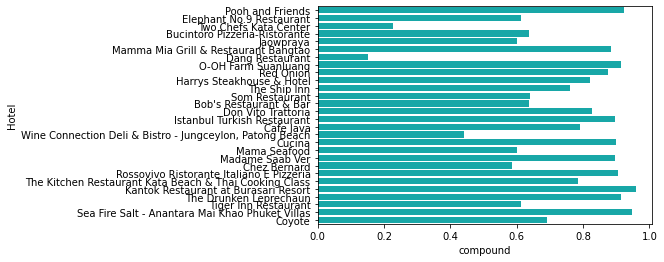

In [48]:
sns.barplot(data=positive_h30, x = "compound", y = "Hotel", color = 'c')

In [49]:
negative_h30.head()

,ID,Review Date,Location,Hotel,Review,cleaned_review,compound,neg,neu,pos,processed_review
22504,rn346298182,"Reviewed February 9, 2016",Bang Tao Beach,Yorkshire Hotel Restaurant,Not many places can do a nice fried breakfast....,Not many places nice fried breakfast This plac...,-0.3468,0.215,0.671,0.113,"[mani, place, nice, fri, breakfast, place, amo..."
49816,rn159230833,"Reviewed April 30, 2013",Patong,Tandoor Phuket Indian,I stayed across at Royal Palm Beach Hotel. I o...,I stayed across Royal Palm Beach Hotel I order...,0.0000,0.000,1.000,0.000,"[stay, across, royal, palm, beach, hotel, orde..."


Checking and plotting barplot for the selected hotels with negative sentiments

<AxesSubplot:xlabel='compound', ylabel='Hotel'>

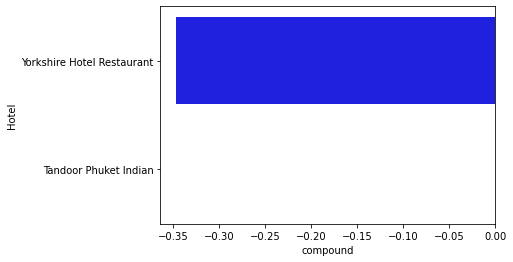

In [50]:
sns.barplot(data=negative_h30, x = "compound", y = "Hotel", color = 'b')

# Generating Wordcloud for Positive and Negative sentiments for the 30 Selected hotels

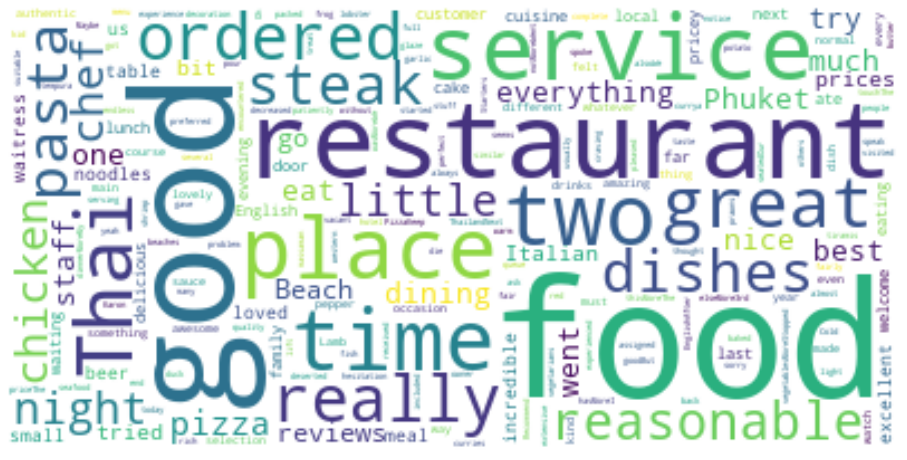

In [51]:
pos_token = [word for review in positive_h30['cleaned_review'] for word in review]
wordcloud = WordCloud(background_color = 'white').generate_from_text(''.join(pos_token))

plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

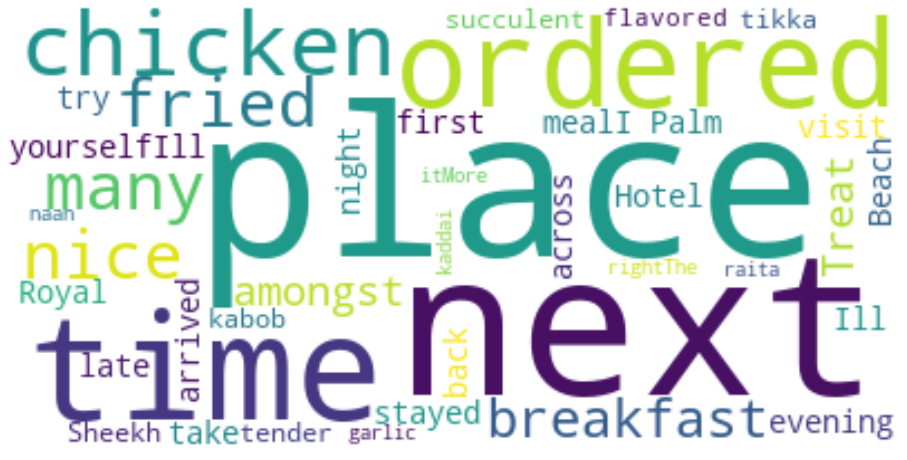

In [52]:
neg_token = [word for review in negative_h30['cleaned_review'] for word in review]
wordcloud = WordCloud(background_color = 'white').generate_from_text(''.join(neg_token))

plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Generating and Visualisation of Frequency of words for Positive and Negative sentiments for the 30 selected hotels

In [53]:
pos_freq_token = [word for review in positive_h30['processed_review'] for word in review]
pos_freqdist = FreqDist(pos_freq_token)
pos_freqdist.tabulate(5)

   food    good restaur  servic   place 
     22      17      12       9       7 


In [54]:
neg_freq_token = [word for review in negative_h30['processed_review'] for word in review]
neg_freqdist = FreqDist(neg_freq_token)
neg_freqdist.tabulate(5)

  place    next    time   order chicken 
      2       2       2       2       2 


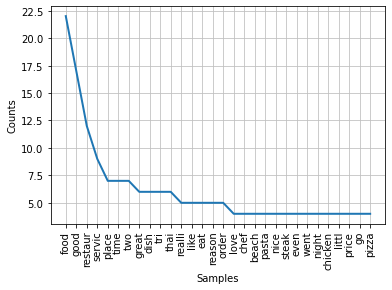

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
pos_freqdist.plot(30)

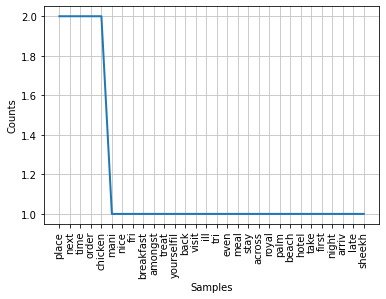

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
neg_freqdist.plot(30)